In [ ]:
#pip install laion-clap

In [1]:
import numpy as np
import librosa
import torch
import laion_clap

# quantization
def int16_to_float32(x):
    return (x / 32767.0).astype(np.float32)


def float32_to_int16(x):
    x = np.clip(x, a_min=-1., a_max=1.)
    return (x * 32767.).astype(np.int16)



/Users/oac466/anaconda3/envs/clap-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# ~/Downloads

In [ ]:
# model = laion_clap.CLAP_Module(enable_fusion=False)
# model.load_ckpt()

model = laion_clap.CLAP_Module(enable_fusion=False, amodel= 'HTSAT-base')
model.load_ckpt('/Users/oac466/Downloads/music_speech_audioset_epoch_15_esc_89.98.pt') # download the default pretrained checkpoint.

/Users/oac466/anaconda3/envs/clap-env/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403212643/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Load the specified checkpoint /Users/oac466/Downloads/music_speech_audioset_epoch_15_esc_89.98.pt from users.
Load Checkpoint...
logit_scale_a 	 Loaded
logit_scale_t 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_real.weight 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_imag.weight 	 Loaded
audio_branch.logmel_extractor.melW 	 Loaded
audio_branch.bn0.weight 	 Loaded
audio_branch.bn0.bias 	 Loaded
audio_branch.patch_embed.proj.weight 	 Loaded
audio_branch.patch_embed.proj.bias 	 Loaded
audio_branch.patch_embed.norm.weight 	 Loaded
audio_branch.patch_embed.norm.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm1.weight 	 Loaded
audio_branch.layers.0.blocks.0.norm1.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.relative_position_bias_table 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.bias 	 Loaded
audio

In [3]:
import os
from natsort import natsorted
#from scipy.io import wavfile

# Path to main folder containing all subfolders
main_folder = "data/mic1_trim_v2"

# First, get the subfolders in a natural-sorted list
# (in case your subfolders also have numeric components in their names)
subfolders = [
    f for f in os.listdir(main_folder)
    if os.path.isdir(os.path.join(main_folder, f))
]
subfolders = natsorted(subfolders)

all_wavs = []  # to collect (filepath, sr, data) or similar

for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)

    # List .wav files in subfolder
    wav_files = [
        f for f in os.listdir(subfolder_path)
        if f.lower().endswith(".wav")
    ]
    # Sort them in natural order
    wav_files = natsorted(wav_files)

    # Process each .wav file
    for wav_file in wav_files:
        wav_path = os.path.join(subfolder_path, wav_file)

        # for example, using librosa (just as a placeholder)
        # import librosa
        # data, sr = librosa.load(wav_path, sr=None)

        # or using scipy
        data,sr = librosa.load(wav_path,sr=48000)

        # collect or do something with the data
        all_wavs.append((wav_path, sr, data))

In [4]:
import pandas as pd
meta_participant = pd.read_csv('data/meta_participant.csv')
meta_audio = pd.read_csv('data/meta_audio.csv')

In [18]:
meta_participant

,PID,GENDER,AGE,RACE/ETHNICITY,FOLDER SIZE (MB),NUMBER OF FILES,TOTAL DURATION (SEC),LC,LW,RC,RW
0,p10085,Woman,21,Asian,9.6,119,300.45,1,1,1,1
1,p10555,Woman,19,Asian,13.8,160,431.22,1,1,1,1
2,p11085,Non-binary,18,Two or more races,13.4,142,419.28,1,1,1,1
3,p12385,Man,23,White,12.5,155,391.89,1,1,1,1
4,p12460,Man,20,Two or more races,12.9,168,403.02,1,1,1,1
5,p15965,Man,19,Asian,12.7,170,396.87,1,1,1,1
6,p18355,Woman,20,Asian,8.4,99,262.26,0,1,0,1
7,p18785,Woman,27,White,9.1,99,282.81,0,1,0,1
8,p20960,Man,18,White,13.6,161,423.75,1,1,1,1
9,p21425,Man,33,Asian,11.7,117,365.25,1,1,1,1


In [5]:
filtered_indices = meta_audio[meta_audio['ACTION LABEL'].isin([0, 1, 2])].index
# filtered_wavs = [all_wavs[i] for i in filtered_indices]

In [6]:
# Get audio embeddings from audio data
audio_data, _ = librosa.load('data/mic1_trim_v2/p10085/p10085.LC.1.161.wav', sr=48000) # sample rate should be 48000
audio_data = audio_data.reshape(1, -1) # Make it (1,T) or (N,T)

audio_embed = model.get_audio_embedding_from_data(x = audio_data, use_tensor=False)
print(audio_embed[:,-20:])
print(audio_embed.shape)


[[-0.01473512  0.01407791  0.0626817   0.08060931  0.08191844  0.0108817
  -0.01646244 -0.03592062 -0.03780748  0.04159889 -0.02378965 -0.02779254
  -0.09213071 -0.01054646  0.0902087  -0.01271668 -0.03600216  0.08788741
   0.00368626 -0.05718187]]
(1, 512)


In [7]:
from tqdm import tqdm # Import the tqdm function from the tqdm module

embeddings = []
for i in tqdm(range(len(all_wavs))): # Now, you're calling the tqdm function
  audio_data = all_wavs[i][2]
  audio_data = audio_data.reshape(1, -1)
  audio_embed = model.get_audio_embedding_from_data(x=audio_data, use_tensor=False)
  embeddings.append(audio_embed)

print(embeddings[0][:,-20:])
embeddings[0].shape

100%|██████████| 7044/7044 [25:20<00:00,  4.63it/s]

[[-0.01473512  0.01407791  0.0626817   0.08060931  0.08191844  0.0108817
  -0.01646244 -0.03592062 -0.03780748  0.04159889 -0.02378965 -0.02779254
  -0.09213071 -0.01054646  0.0902087  -0.01271668 -0.03600216  0.08788741
   0.00368626 -0.05718187]]


(1, 512)

In [10]:
meta_audio['NOTES']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
7039    no pain rating given so copied down rather tha...
7040    click in middle; no pain rating given so copie...
7041    no pain rating given so copied down rather tha...
7042    first word "Help" cut out; slight click at end...
7043    majority of sentence cut out ("the pain I feel...
Name: NOTES, Length: 7044, dtype: object

In [ ]:
from tqdm import tqdm # Import the tqdm function from the tqdm module

text_embeddings = []
for i in tqdm(range(len(meta_audio))): # Now, you're calling the tqdm function
  text_data = meta_audio['NOTES'][i]
  if not isinstance(text_data, str):
    text_data = ' '
  text_embed = model.get_text_embedding(text_data)
  text_embeddings.append(text_embed)

100%|██████████| 7044/7044 [07:59<00:00, 14.69it/s]


AttributeError: 'list' object has no attribute 'shape'

In [13]:
# print(text_embeddings)
np.array(text_embeddings).shape

(7044, 1, 512)

In [14]:
text_embeddings_array = np.array(text_embeddings).squeeze()
text_embeddings_array.shape

(7044, 512)

In [15]:
np.save('Text Embeddings.npy', text_embeddings_array)

In [16]:
# Convert embeddings to a NumPy array
X = np.array(embeddings).squeeze() # Squeeze to remove extra dimensions if necessary
X_filtered = X[filtered_indices]

In [17]:
np.save('Audio Embeddings.npy', X)

In [20]:
# prompt: load Audio Embeddings.npy

import numpy as np

# Load the saved embeddings
audio_embeddings = np.load('Audio Embeddings.npy')

# Now you can work with the loaded embeddings
print(audio_embeddings.shape)



(7044, 512)


In [21]:
embeddings_combined = np.concatenate((audio_embeddings, text_embeddings_array), axis=1)
embeddings_combined.shape

(7044, 1024)

In [22]:
participant_data= meta_participant.loc[meta_participant.index.repeat(meta_participant["NUMBER OF FILES"])]

# 3. Reset the index (optional, but usually helpful)
participant_data.reset_index(drop=True, inplace=True)
# Merge meta_audio and participant_data DataFrames
merged_df = pd.merge(meta_audio, participant_data, left_index=True, right_index=True)
# merged_df = merged_df[merged_df['ACTION LABEL'].isin([0, 1, 2])]

In [28]:
merged_df[['RW', 'RC']]

,RW,RC
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
7039,1,1
7040,1,1
7041,1,1
7042,1,1


In [44]:
tabular_data = merged_df.loc[:, ['GENDER', 'AGE', 'RACE/ETHNICITY', 'TOTAL DURATION (SEC)']]
tabular_data = pd.get_dummies(tabular_data, columns=['GENDER', 'RACE/ETHNICITY'], dtype=np.float32)
num_tab_features = tabular_data.shape[1]

In [45]:
labels = merged_df.loc[:,'REVISED PAIN']
labels= np.array([0 if x < 4 else 1 for x in labels]) # Labels: 0 or 1 for "No Pain"/"Pain"

In [46]:
# prompt: fit a random forest classifier using embeddings as vairables and labels as target

import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [47]:
df = pd.DataFrame(embeddings_combined)
tabular_data_reset = tabular_data.reset_index(drop=False)  # Reset index of tabular_data
merged_features = pd.concat([df, tabular_data_reset], axis=1) # Concatenate along columns (axis=1)
merged_features.index = merged_df.index
merged_features = merged_features.drop(columns=['index'])
merged_features.head()

,0,1,2,3,4,5,6,7,8,9,...,TOTAL DURATION (SEC),GENDER_Male,GENDER_Man,GENDER_Non-binary,GENDER_Woman,RACE/ETHNICITY_Asian,RACE/ETHNICITY_Black or African American,RACE/ETHNICITY_Hispanic/Latino,RACE/ETHNICITY_Two or more races,RACE/ETHNICITY_White
0,-0.057114,0.059313,-0.060191,-0.018176,-0.084338,0.034319,-0.058333,0.018405,0.068168,-0.077160,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.074543,0.059482,-0.023707,-0.031039,-0.080793,0.020725,-0.059566,0.012630,0.088856,-0.075533,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.088873,0.066683,-0.039078,-0.013078,-0.081851,0.002385,-0.033466,0.038994,0.053495,-0.089920,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,-0.079781,0.052505,-0.031692,-0.014320,-0.075479,0.012609,-0.057462,-0.004710,0.082208,-0.084615,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-0.067623,0.042367,-0.049939,-0.033383,-0.096456,0.037647,-0.042283,0.001679,0.071254,-0.070512,...,300.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
unique_pids = np.array(merged_df['PID_x'].unique())
random_pid = np.random.choice(unique_pids, size=10, replace=False)
# X_train, y_train = merged_features[~merged_df['PID_x'].isin(random_pid)], labels[~merged_df['PID_x'].isin(random_pid)]
# X_test, y_test = merged_features[merged_df['PID_x'].isin(random_pid)], labels[merged_df['PID_x'].isin(random_pid)]

X_train, X_test, y_train, y_test = train_test_split(merged_features, labels, test_size=0.3, random_state=2)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Define the neural network architecture
class ComplexClassifier(nn.Module):
    def __init__(self, input_size):
        super(ComplexClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)  # Dropout for regularization
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x


In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Get the number of input features
model = ComplexClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


# Training loop
num_epochs = 2500 # Adjust as needed
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
       print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_pred_tensor = model(X_test_tensor)
y_pred = torch.argmax(y_pred_tensor, dim=1)

In [ ]:
for pid in random_pid:
  index = merged_df[merged_df['PID_x'] == pid].index
  X_test_pid = merged_features.iloc[index,:]
  X_test_scaled_pid = scaler.transform(X_test_pid)
  X_test_tensor_pid = torch.tensor(X_test_scaled_pid, dtype=torch.float32)
  y_pred_tensor_pid = model(X_test_tensor_pid)
  y_pred_pid = torch.argmax(y_pred_tensor_pid, dim=1).numpy()
  y_test_pid = labels[index]
  acc = accuracy_score(y_test_pid, y_pred_pid)
  auc = roc_auc_score(y_test_pid, y_pred_pid)
  # f1 = f1_score(y_test_pid, y_pred_pid,average='micro')

  # Print the results
  print(f"Test Accuracy: {acc * 100:.2f}%")
  print(f"Test AUC: {auc * 100:.2f}%")
  # print(f"Test F1 Score: {f1 * 100:.2f}%")

Test Accuracy: 74.65%
Test AUC: 73.17%
Test F1 Score: 74.65%


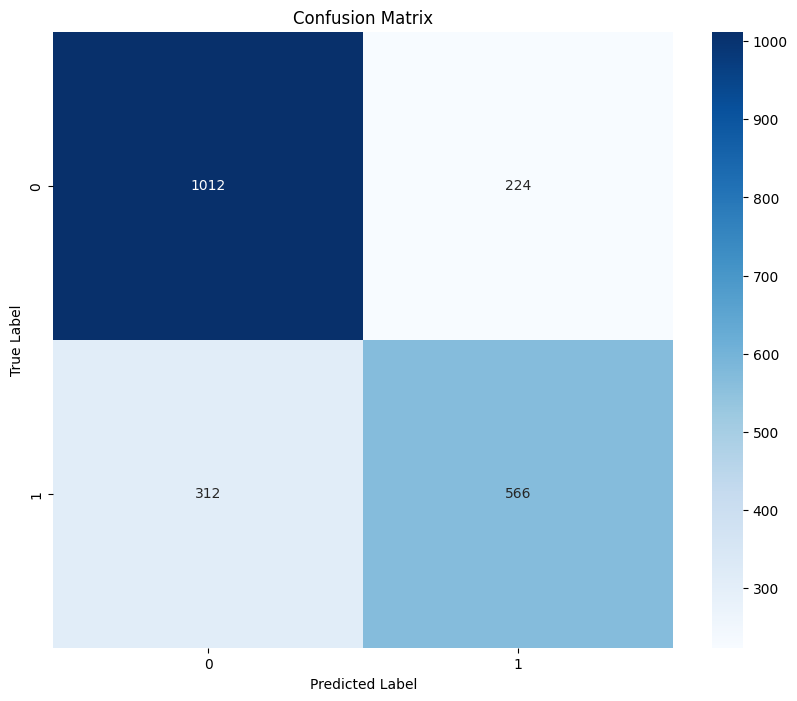

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# all_preds = xgb_classifier.predict(X_test)
all_preds = y_pred.numpy()
# Calculate accuracy
acc = accuracy_score(y_test, all_preds)
auc = roc_auc_score(y_test, all_preds)
f1_scor = f1_score(y_test, all_preds,average='micro')

# Print the results
print(f"Test Accuracy: {acc * 100:.2f}%")
print(f"Test AUC: {auc * 100:.2f}%")
print(f"Test F1 Score: {f1_scor * 100:.2f}%")

# Compute confusion matrix
cm = confusion_matrix(y_test, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
#
# plt.show()

In [40]:
#1 indicates completion of the task, 0 indicates failure
mask_rc_lw_1 = merged_df[['RC', 'LW']] == 1
mask_rc_lw_0 = merged_df[['RC', 'LW']] == 0


In [42]:
successful_completion_merged_df = merged_df[mask_rc_lw_1.all(axis=1)]

In [50]:
merged_features['Pain'] = labels

In [51]:
merged_features[mask_rc_lw_1.all(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,GENDER_Male,GENDER_Man,GENDER_Non-binary,GENDER_Woman,RACE/ETHNICITY_Asian,RACE/ETHNICITY_Black or African American,RACE/ETHNICITY_Hispanic/Latino,RACE/ETHNICITY_Two or more races,RACE/ETHNICITY_White,Pain
0,-0.057114,0.059313,-0.060191,-0.018176,-0.084338,0.034319,-0.058333,0.018405,0.068168,-0.077160,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.074543,0.059482,-0.023707,-0.031039,-0.080793,0.020725,-0.059566,0.012630,0.088856,-0.075533,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,-0.088873,0.066683,-0.039078,-0.013078,-0.081851,0.002385,-0.033466,0.038994,0.053495,-0.089920,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
3,-0.079781,0.052505,-0.031692,-0.014320,-0.075479,0.012609,-0.057462,-0.004710,0.082208,-0.084615,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.067623,0.042367,-0.049939,-0.033383,-0.096456,0.037647,-0.042283,0.001679,0.071254,-0.070512,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,-0.065515,0.002374,-0.044538,0.033817,-0.140595,0.029974,-0.025950,0.034192,0.022685,-0.014089,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7040,-0.037051,0.008038,0.001874,0.033752,-0.111596,0.013145,-0.067856,-0.019096,0.024045,-0.004642,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7041,-0.055658,-0.003297,0.003345,0.001668,-0.107872,0.028781,-0.052147,-0.015808,0.047087,-0.002457,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
7042,-0.068889,-0.007317,-0.020073,0.027626,-0.096740,0.030277,-0.012475,0.025860,0.028355,-0.034159,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [61]:
X = merged_features[mask_rc_lw_1.all(axis=1)].drop(columns=['Pain'])
X.columns = X.columns.astype(str)
Y = merged_features[mask_rc_lw_1.all(axis=1)][['Pain']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [77]:
import tqdm

In [ ]:
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Get the number of input features
model = ComplexClassifier(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


# Training loop
num_epochs = 2500 # Adjust as needed
for epoch in tqdm.tqdm(range(num_epochs), desc="Training Epochs"):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
       print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Training Epochs:   4%|▍         | 106/2500 [00:03<01:07, 35.61it/s]

Epoch [100/2500], Loss: -0.0000


Training Epochs:   8%|▊         | 203/2500 [00:06<01:09, 32.98it/s]

Epoch [200/2500], Loss: -0.0000


Training Epochs:  12%|█▏        | 303/2500 [00:09<01:08, 32.07it/s]

Epoch [300/2500], Loss: -0.0000


Training Epochs:  16%|█▌        | 404/2500 [00:12<01:02, 33.62it/s]

Epoch [400/2500], Loss: -0.0000


Training Epochs:  20%|██        | 507/2500 [00:15<00:56, 35.08it/s]

Epoch [500/2500], Loss: -0.0000


Training Epochs:  24%|██▍       | 605/2500 [00:17<00:47, 39.68it/s]

Epoch [600/2500], Loss: -0.0000


Training Epochs:  28%|██▊       | 704/2500 [00:20<00:46, 38.27it/s]

Epoch [700/2500], Loss: -0.0000


Training Epochs:  32%|███▏      | 803/2500 [00:23<00:54, 31.11it/s]

Epoch [800/2500], Loss: -0.0000


Training Epochs:  36%|███▌      | 904/2500 [00:26<00:45, 34.75it/s]

Epoch [900/2500], Loss: -0.0000


Training Epochs:  40%|████      | 1008/2500 [00:29<00:37, 40.01it/s]

Epoch [1000/2500], Loss: -0.0000


Training Epochs:  44%|████▍     | 1105/2500 [00:32<00:38, 36.07it/s]

Epoch [1100/2500], Loss: -0.0000


Training Epochs:  48%|████▊     | 1206/2500 [00:35<00:40, 32.12it/s]

Epoch [1200/2500], Loss: -0.0000


Training Epochs:  52%|█████▏    | 1304/2500 [00:38<00:37, 32.07it/s]

Epoch [1300/2500], Loss: -0.0000


Training Epochs:  56%|█████▌    | 1405/2500 [00:40<00:29, 36.67it/s]

Epoch [1400/2500], Loss: -0.0000


Training Epochs:  60%|██████    | 1506/2500 [00:43<00:26, 37.78it/s]

Epoch [1500/2500], Loss: -0.0000


Training Epochs:  64%|██████▍   | 1607/2500 [00:46<00:23, 38.18it/s]

Epoch [1600/2500], Loss: -0.0000


Training Epochs:  68%|██████▊   | 1704/2500 [00:48<00:23, 33.36it/s]

Epoch [1700/2500], Loss: -0.0000


Training Epochs:  72%|███████▏  | 1805/2500 [00:51<00:21, 32.77it/s]

Epoch [1800/2500], Loss: -0.0000


Training Epochs:  76%|███████▋  | 1907/2500 [00:54<00:15, 37.81it/s]

Epoch [1900/2500], Loss: -0.0000


Training Epochs:  80%|████████  | 2006/2500 [00:57<00:12, 38.24it/s]

Epoch [2000/2500], Loss: -0.0000


Training Epochs:  84%|████████▍ | 2103/2500 [00:59<00:13, 29.00it/s]

Epoch [2100/2500], Loss: -0.0000


Training Epochs:  88%|████████▊ | 2204/2500 [01:03<00:10, 29.05it/s]

Epoch [2200/2500], Loss: -0.0000


Training Epochs:  92%|█████████▏| 2305/2500 [01:06<00:06, 32.09it/s]

Epoch [2300/2500], Loss: -0.0000


Training Epochs:  96%|█████████▌| 2406/2500 [01:09<00:02, 35.64it/s]

Epoch [2400/2500], Loss: -0.0000


Training Epochs: 100%|██████████| 2500/2500 [01:11<00:00, 34.83it/s]

Epoch [2500/2500], Loss: -0.0000


In [73]:
# Convert probabilities to class labels
np.unique(torch.argmax(outputs, dim=1))

array([0])

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])